In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import run
%matplotlib inline

In [9]:
#input is positions, and attachments...

In [10]:
positions = [[0,0,0],[1,0,0],[0,1,0],[0,0,1]]

In [11]:
bonds = [[0,1],[0,2],[0,3],[1,2],[2,3]]

In [12]:
lengths = run.define_bonds(positions,bonds)

In [13]:
lengths

[1.0, 1.0, 1.0, 1.4142135623730951, 1.4142135623730951]

In [14]:
out = run.run_simulation(positions = positions, 
                        bonds = bonds,
                        lengths = lengths)

> /media/wtk23/Maxtor/OTHER/PROJECT_OVERFLOW/npr_automated/npr/TESTS/run.py(37)run_simulation()
-> snapshot.bonds.group[:] = bonds
*** NameError: name 'i' is not defined
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


BdbQuit: 

In [12]:
import hoomd

In [13]:
dists = run.get_distance_distribution(out,0,1)

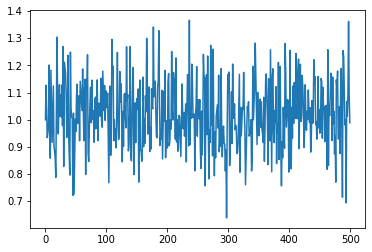

In [14]:
plt.plot(dists)